In [2]:
#Run Length Encoding
import pandas as pd

# Load data into a pandas dataframe
data = pd.read_csv('/content/rpmreading.csv')

# Define a function for run-length encoding
def rle_encode(data):
    encoded_data = []
    count = 1
    current_value = data[0]
    for value in data[1:]:
        if value == current_value:
            count += 1
        else:
            encoded_data.append((current_value, count))
            count = 1
            current_value = value
    # Append the last run to the encoded data
    encoded_data.append((current_value, count))
    return encoded_data

# Apply run-length encoding to each column of the data
encoded_data = {}
for column in data.columns:
    encoded_data[column] = rle_encode(data[column].tolist())

# Print the encoded data
print(encoded_data)


{'timestamp': [('2023-02-21 12:32:26.000 -0600', 1748), ('2023-02-21 14:34:57.000 -0600', 1756), ('2023-02-21 14:35:58.000 -0600', 1752), ('2023-02-21 15:11:57.000 -0600', 1752), ('2023-02-22 11:49:45.000 -0600', 1768), ('2023-02-22 13:45:50.000 -0600', 1424)], 'nodeid': [(1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (27, 4), (28, 4), (29, 4), (30, 4), (31, 4), (32, 4), (33, 4), (34, 4), (35, 4), (36, 4), (37, 4), (38, 4), (39, 4), (40, 4), (41, 4), (42, 4), (43, 4), (44, 4), (45, 4), (46, 4), (47, 4), (48, 4), (49, 4), (51, 4), (52, 4), (53, 4), (55, 4), (56, 4), (57, 4), (58, 4), (59, 4), (60, 4), (61, 4), (62, 4), (63, 4), (64, 4), (65, 4), (66, 4), (67, 4), (68, 4), (69, 4), (70, 4), (71, 4), (73, 4), (74, 4), (75, 4), (76, 4), (77, 4), (78, 4), (79, 4), (80, 4), (81, 4), (82, 4), (83, 4), (84, 4), (85, 4), (86, 4), (87, 4

<Axes: xlabel='timestamp'>

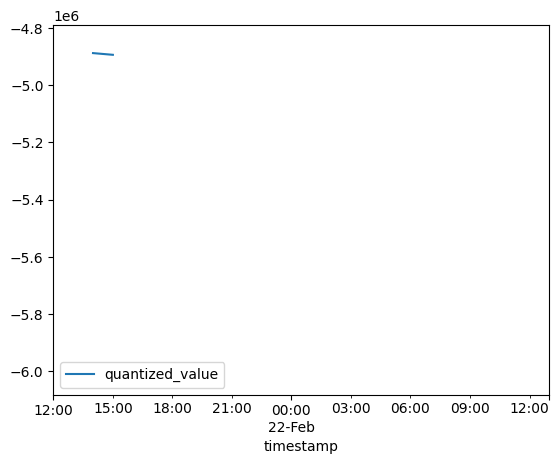

In [3]:
#Quantization Aggregation: 
# Step 1: Read the time series data into a pandas dataframe 
df = pd.read_csv('/content/rpmreading.csv') 
# Step 2: Convert the timestamp column to datetime format and set it as the index 
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S') 
df = df.set_index('timestamp') 
# Step 3: Quantize the values of the data 
quantization_factor = 10 
df['quantized_value'] = (df['value'] // quantization_factor) * quantization_factor 
# Step 4: Group the data by hour and aggregate the values by the mean of the quantized values 
df_agg = df.groupby(pd.Grouper(freq='1H')).agg({'quantized_value': 'mean'}) 
# Step 5: Plot the aggregated data 
df_agg.plot()


<ipython-input-12-7200f00be834>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_mean = df.resample('D').mean()


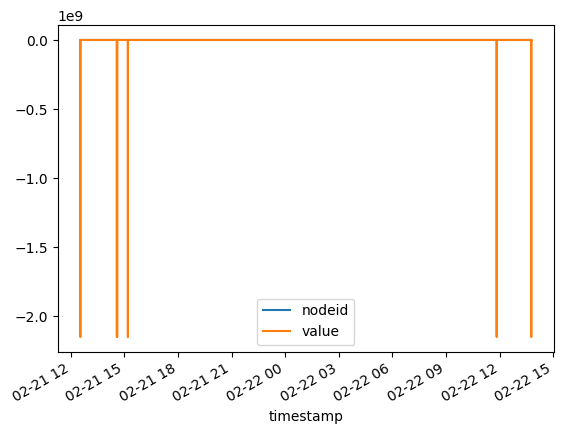

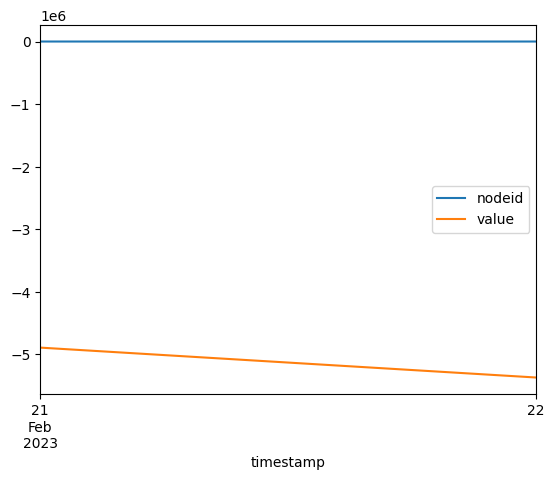

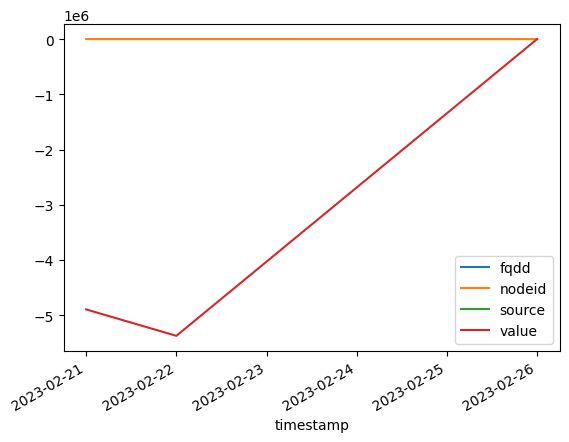

In [12]:
import pandas as pd 
from matplotlib import pyplot as plt
# Load the data from file 
df = pd.read_csv('/content/rpmreading.csv') 
# Convert timestamp column to datetime format and set as index 
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df = df.set_index('timestamp') 
# Group the data by date and calculate the daily mean 
daily_mean = df.resample('D').mean() 
# Calculate the residuals by subtracting the daily mean from the original values 
residuals = df - daily_mean.reindex(df.index, method='ffill') 
# Group the residuals by week and calculate the weekly mean 
weekly_mean_residuals = residuals.resample('W').mean() 
# Add the daily mean back to the weekly mean residuals to get the weekly mean 
weekly_mean = weekly_mean_residuals.add(daily_mean, fill_value=0) 
# Plot the original data, daily mean, and weekly mean 
df.plot(label='Original data') 
daily_mean.plot(label='Daily mean') 
weekly_mean.plot(label='Weekly mean') 
plt.legend() 
plt.show()


In [9]:
import pandas as pd  
df = pd.read_csv("/content/rpmreading.csv")  
agg_df = df.groupby("nodeid").agg({"value": "mean"})  
print(agg_df) 


               value
nodeid              
1        7495.833333
2        7507.500000
3        7487.083333
4        7513.333333
5       11474.166667
...              ...
463      8764.000000
464     10290.000000
465     10335.500000
466     10339.000000
467     10335.500000

[443 rows x 1 columns]


In [8]:
import pandas as pd 

# Load data into a pandas dataframe 
df = pd.read_csv("/content/voltagereading.csv") 

# Convert the timestamp column to a datetime object 
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f %z') 

# Calculate the difference between consecutive rows of value column 
df['diff'] = df['value'].diff() 

# Find the index of rows where the difference is greater than 2 (Ex:2,100,150)
idx = df.index[df['diff'] > 150].tolist()

# Get the number of alerts by subtracting the number of first rows from the number of rows with difference greater than 2 
num_alerts = len(idx) - idx[0] + 1 

# Print the result 
print("Number of alerts:", num_alerts) 


Number of alerts: 70


In [7]:
#Preprocessing the data
import pandas as pd  
# Read in the data 
data = pd.read_csv("/content/voltagereading.csv") 
# Convert the timestamp column to a datetime format 
data['timestamp'] = pd.to_datetime(data['timestamp'], format="%Y-%m-%d %H:%M:%S.%f %z") 
# Normalize the value column 
data['value'] = (data['value'] - data['value'].mean()) / data['value'].std() 
# Show the first 5 rows of the data 
print(data.head()) 


                  timestamp  nodeid               source   fqdd     value
0 2023-02-21 12:32:26-06:00       1  #Thermal.v1_4_0.Fan  FAN_1  0.063317
1 2023-02-21 12:32:26-06:00       1  #Thermal.v1_4_0.Fan  FAN_2  0.063317
2 2023-02-21 12:32:26-06:00       1  #Thermal.v1_4_0.Fan  FAN_3  0.063318
3 2023-02-21 12:32:26-06:00       1  #Thermal.v1_4_0.Fan  FAN_4  0.063318
4 2023-02-21 12:32:26-06:00       2  #Thermal.v1_4_0.Fan  FAN_1  0.063317
